# Optimization Using Gradient Descent: Linear Regression

In this assignment, you will build a simple linear regression model to predict sales based on TV marketing expenses. You will investigate three different approaches to this problem. You will use `NumPy` and `Scikit-Learn` linear regression models, as well as construct and optimize the sum of squares cost function with gradient descent from scratch.

Further you will add additional cells to compare Linear regression and atleast 1 other algorithm

# Table of Contents

- [ 1 - Open the Dataset and State the Problem]
  - [ Exercise 1]
- [ 2 - Linear Regression in Python with `NumPy` and `Scikit-Learn`]
  - [ 2.1 - Linear Regression with `NumPy`]
    - [ Exercise 2]
  - [ 2.2 - Linear Regression with `Scikit-Learn`]
    - [ Exercise 3]
    - [ Exercise 4]
- [ 3 - Linear Regression using Gradient Descent]
  - [ Exercise 5]
  - [ Exercise 6]

## Packages

Load the required packages:

In [101]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

Import the unit tests defined for this notebook.

In [103]:
# create a file path to our test file
# since the w2_unittest is inside my mounted drive
file_path = "/content/drive/MyDrive/ML_SUMMATIVE/"
# adding the file directory to the system path
sys.path.append(file_path)

In [ ]:
import w2_unittest

<a name='1'></a>
## 1 - Open the Dataset and State the Problem

In this lab, you will build a linear regression model for a simple Kaggle dataset, saved in a file `data/tvmarketing.csv`. The dataset has only two fields: TV marketing expenses (`TV`) and sales amount (`Sales`).

<a name='ex01'></a>
### Exercise 1

Use `pandas` function `pd.read_csv` to open the .csv file the from the `path`.

### Problem Statement

**The problem I am addressing in this analysis is to predict sales based on TV marketing expenses.**

I aim to build models that can take the TV marketing budget as input and accurately estimate the corresponding sales amount as output.

I will explore different techiques like;

* **Linear Regression:** Assuming a linear relationship between TV marketing expenses and sales.
* **Decision Trees:** To capture potential non-linear relationships and feature interactions.
* **Random Forests:** As an ensemble method to improve prediction accuracy and robustness.

By comparing the performance of these models, I aim to identify the most effective approach for predicting sales based on TV marketing expenses.


### Importance of Stating the Problem

Clearly defining the problem is crucial for several reasons:

1. **Clarity and Focus:** A well-defined problem statement provides clarity and focus to the analysis, guiding the subsequent steps and choices I make in data preprocessing, model selection, and evaluation.

2. **Model Selection:** Understanding the problem helps me choose the appropriate model and evaluation metrics.

3. **Communication:** A clear problem statement facilitates effective communication of the purpose and findings of the analysis to others. It ensures that everyone involved understands the goals and outcomes of the project.


By explicitly stating the problem, I establish a clear direction for my analysis and lay the foundation for a successful outcome.

In [105]:
# get the csv file from the drive we mounted
# doing a string f formater with the path variable and the parent path.
path = "Data/tvmarketing.csv"
adv = pd.read_csv(f'/content/drive/MyDrive/ML_SUMMATIVE/{path}')

In [106]:
# Print some part of the dataset.
adv.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


##### __Expected Output__

```Python
	TV	Sales
0	230.1	22.1
1	44.5	10.4
2	17.2	9.3
3	151.5	18.5
4	180.8	12.9
```

In [107]:
w2_unittest.test_load_data(adv)

 All tests passed


`pandas` has a function to make plots from the DataFrame fields. By default, matplotlib is used at the backend. Let's use it here:

<Axes: xlabel='TV', ylabel='Sales'>

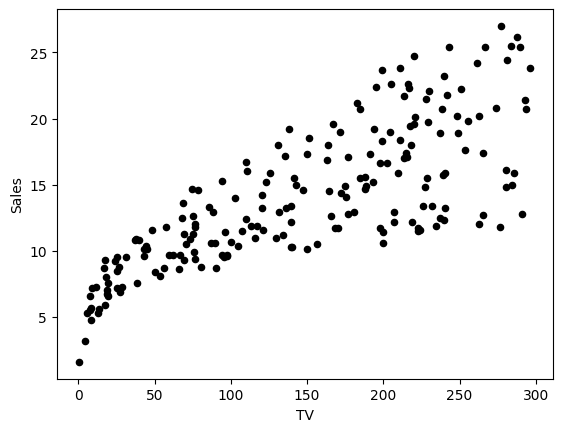

In [108]:
adv.plot(x='TV', y='Sales', kind='scatter', c='black')

### SCATTER PLOT HYPOTHESIS
From the previous scatter plot an hypothesis can be said that the relationship between tv marketing expenses and sales could be a linear model i.e a straight line in the positive direction i.e as the tv marketing expenses increase the sales of that product also increases but how can we validate this? How about we find the correlation matrix between our feature(tv marketing expenses) and target(tv sales) 😁

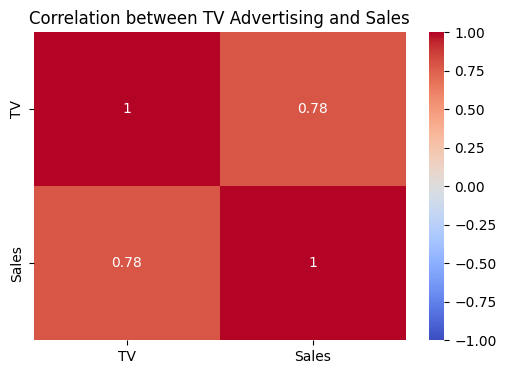

In [109]:
# @title Correlation between TV Advertising and Sales
# Assuming your data is in a pandas DataFrame called 'adv'
correlation_matrix = adv[['TV', 'Sales']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
_ = plt.title('Correlation between TV Advertising and Sales')

### CORRELATION HEAT MAP PROOF
The correlation heat map proves our hypothesis that the relationship between tv marketing expenses and tv sales appears to be linear, also it is a positve linear relationship i.e as marketing expenses go up the sales also go up from the anti-diagonal it appears that the correlation between tv marketing expenses and sales is strong which is about 0.78 but can a simple linear regression help us capture the relationship because it appears that the scatter plot as a tiny curve we are about to find out 😁

You can use this dataset to solve a simple problem with linear regression: given a TV marketing budget, predict sales.

<a name='2'></a>
## 2 - Linear Regression in Python with `NumPy` and `Scikit-Learn`

Save the required field of the DataFrame into variables `X` and `Y`:

In [110]:
X = adv['TV']
Y = adv['Sales']

In [111]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [112]:
X.describe()

,TV
count,200.000000
mean,147.042500
std,85.854236
min,0.700000
25%,74.375000
50%,149.750000
75%,218.825000
max,296.400000


In [113]:
Y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


<a name='2.1'></a>
### 2.1 - Linear Regression with `NumPy`

You can use the function `np.polyfit(x, y, deg)` to fit a polynomial of degree `deg` to points $(x, y)$, minimising the sum of squared errors. You can read more in the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). Taking `deg = 1` you can obtain the slope `m` and the intercept `b` of the linear regression line:

In [114]:
m_numpy, b_numpy = np.polyfit(X, Y, deg=1)

print(f"Linear regression with NumPy. Slope: {m_numpy}. Intercept: {b_numpy}")

Linear regression with NumPy. Slope: 0.04753664043301975. Intercept: 7.0325935491276965


*Note*: [`NumPy` documentation](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) suggests the [`Polynomial.fit` class method](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.Polynomial.fit.html#numpy.polynomial.polynomial.Polynomial.fit) as recommended for new code as it is more stable numerically. But in this simple example, you can stick to the `np.polyfit` function for simplicity.

<a name='ex02'></a>
### Exercise 2

Make predictions substituting the obtained slope and intercept coefficients into the equation $Y = mX + b$, given an array of $X$ values.

In [115]:
# This is organised as a function only for grading purposes.
def pred_numpy(m, b, X):
    Y = m * X + b
    return Y

# Visualizing predictions
So here we are going to visualize own own predicted y values using our slope and bias gottting from np.polyfit to see how it did.

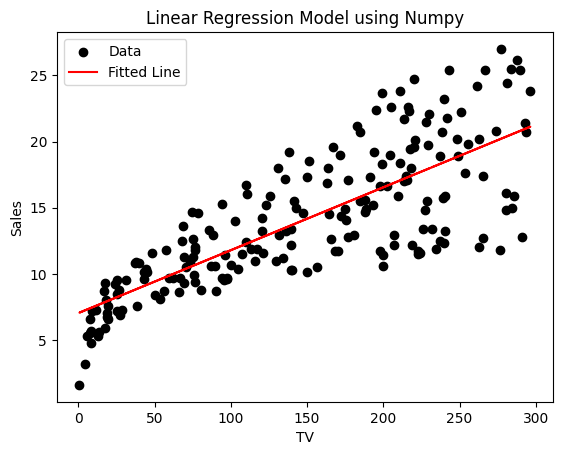

In [116]:
plt.scatter(X, Y, color='black', label='Data')  # Plot the original data
plt.plot(X, m_numpy * X + b_numpy, color='red', label='Fitted Line')  # Plot the fitted line
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Linear Regression Model using Numpy')
plt.legend()
plt.show()

In [117]:
X_pred = np.array([50, 120, 280])
Y_pred_numpy = pred_numpy(m_numpy, b_numpy, X_pred)

print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using NumPy linear regression:\n{Y_pred_numpy}")

TV marketing expenses:
[ 50 120 280]
Predictions of sales using NumPy linear regression:
[ 9.40942557 12.7369904  20.34285287]


##### __Expected Output__

```Python
TV marketing expenses:
[ 50 120 280]
Predictions of sales using NumPy linear regression:
[ 9.40942557 12.7369904  20.34285287]
```

In [118]:
w2_unittest.test_pred_numpy(pred_numpy)

 All tests passed


<a name='2.2'></a>
### 2.2 - Linear Regression with `Scikit-Learn`

`Scikit-Learn` is an open-source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities. `Scikit-learn` provides dozens of built-in machine learning algorithms and models, called **estimators**. Each estimator can be fitted to some data using its `fit` method. Full documentation can be found [here](https://scikit-learn.org/stable/).

Create an estimator object for a linear regression model:

In [119]:
lr_sklearn = LinearRegression()

The estimator can learn from data calling the `fit` function. However, trying to run the following code you will get an error, as the data needs to be reshaped into 2D array:

In [120]:
print(f"Shape of X array: {X.shape}")
print(f"Shape of Y array: {Y.shape}")

try:
    lr_sklearn.fit(X, Y)
except ValueError as err:
    print(err)

Shape of X array: (200,)
Shape of Y array: (200,)
Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.


You can increase the dimension of the array by one with `reshape` function, or there is another another way to do it:

In [121]:
X_sklearn = np.array(X).reshape(-1, 1)
Y_sklearn = np.array(Y).reshape(-1, 1)

print(f"Shape of new X array: {X_sklearn.shape}")
print(f"Shape of new Y array: {Y_sklearn.shape}")

Shape of new X array: (200, 1)
Shape of new Y array: (200, 1)


You have already loaded your dataset into X_sklearn and Y_sklearn
Step 1: Split the data into training and testing sets use train_test_split from sklearn
The test size shoukd be 20% of the data

In [122]:
X_train, X_test, Y_train, Y_test = train_test_split(X_sklearn, Y_sklearn, test_size=0.2, random_state=42)


Step 2: Fit the linear regression model to the training data


In [123]:
lr_sklearn.fit(X_train, Y_train) #Insert proper arguments fro training asper step 1

LinearRegression()


 Step 3: Make predictions using the fitted model on the testing data


In [124]:
Y_pred = lr_sklearn.predict(X_test)#use test data from X from step 1 above)
Y_pred

array([[14.71794394],
       [16.2115484 ],
       [20.74819743],
       [ 7.66403631],
       [17.37013877],
       [10.61402143],
       [17.2072847 ],
       [ 9.44612512],
       [17.46785121],
       [15.2669948 ],
       [ 8.58532504],
       [ 9.73460946],
       [18.03086098],
       [ 7.37089899],
       [13.61053628],
       [15.03899911],
       [ 7.45930549],
       [16.31391381],
       [10.62332738],
       [18.16579721],
       [17.79821232],
       [10.27435438],
       [ 8.88776831],
       [18.79394862],
       [10.33019006],
       [ 9.60897918],
       [17.05373658],
       [13.60123034],
       [11.17703121],
       [ 7.51048819],
       [16.41627922],
       [10.339496  ],
       [16.37440246],
       [ 7.90599093],
       [20.18053468],
       [18.203021  ],
       [ 9.36702457],
       [19.85482655],
       [12.57292322],
       [ 8.39920611]])

 Step 4: Calculate the RMSE
Using sklearn.metrics - mean_squared_error

In [125]:
#Insert your code here
rmse =  np.sqrt(mean_squared_error(Y_test, Y_pred))
print("Root Mean Square Error:", rmse)

Root Mean Square Error: 3.194472431998898


TO DO Create an estimator object for Random Forest and Desision Trees and compare RSMES:

In [126]:
# To do
#Print out the rank of models From the best to the worst performing and associated RSMEs

# Create models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
dt_model = DecisionTreeRegressor(random_state=42)

# Train all models
lr_model.fit(X_train, Y_train)
rf_model.fit(X_train, Y_train)
dt_model.fit(X_train, Y_train)

# Make predictions
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
dt_pred = dt_model.predict(X_test)

# Calculate RMSE for each model
lr_rmse = np.sqrt(mean_squared_error(Y_test, lr_pred))
rf_rmse = np.sqrt(mean_squared_error(Y_test, rf_pred))
dt_rmse = np.sqrt(mean_squared_error(Y_test, dt_pred))

model_rank = {
    'Linear Regression': lr_rmse,
    'Random Forest': rf_rmse,
    'Decision Trees': dt_rmse
}
model_rank

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


{'Linear Regression': 3.194472431998898,
 'Random Forest': 3.017054389029325,
 'Decision Trees': 3.445214071723265}

The estimator can learn from data calling the `fit` function for RandomForest and Decision Trees

Compare the RSME for the three different models and rank them according to performance i.e Print out Model Rank and Associated RSME

In [127]:
# Sort results by RMSE (ascending)
ranked_models = sorted(model_rank.items(), key=lambda item: item[1])

# Print rankings
print("Model Rankings (by RMSE):")
for model_name, rmse in ranked_models:
    print(f"{model_name}: {rmse}")

Model Rankings (by RMSE):
Random Forest: 3.017054389029325
Linear Regression: 3.194472431998898
Decision Trees: 3.445214071723265


<a name='ex03'></a>
### Exercise 3

Fit the linear regression model passing `X_sklearn` and `Y_sklearn` arrays into the function `lr_sklearn.fit`.

In [128]:
lr_sklearn.fit(X_sklearn, Y_sklearn)

LinearRegression()

In [129]:
m_sklearn = lr_sklearn.coef_
b_sklearn = lr_sklearn.intercept_

print(f"Linear regression using Scikit-Learn. Slope: {m_sklearn}. Intercept: {b_sklearn}")

Linear regression using Scikit-Learn. Slope: [[0.04753664]]. Intercept: [7.03259355]


##### __Expected Output__

```Python
Linear regression using Scikit-Learn. Slope: [[0.04753664]]. Intercept: [7.03259355]
```

In [130]:
w2_unittest.test_sklearn_fit(lr_sklearn)

 All tests passed


Note that you have got the same result as with the `NumPy` function `polyfit`. Now, to make predictions it is convenient to use `Scikit-Learn` function `predict`.

<a name='ex04'></a>
### Exercise 4


Increase the dimension of the $X$ array using the function `np.newaxis` (see an example above) and pass the result to the `lr_sklearn.predict` function to make predictions.

In [131]:
# This is organised as a function only for grading purposes.
def pred_sklearn(X, lr_sklearn):
    ### START CODE HERE ### (~ 2 lines of code)
    X_2D = X[:, np.newaxis]
    Y = lr_sklearn.predict(X_2D)
    ### END CODE HERE ###

    return Y

In [132]:
Y_pred_sklearn = pred_sklearn(X_pred, lr_sklearn)

print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using Scikit_Learn linear regression:\n{Y_pred_sklearn.T}")

TV marketing expenses:
[ 50 120 280]
Predictions of sales using Scikit_Learn linear regression:
[[ 9.40942557 12.7369904  20.34285287]]


##### __Expected Output__

```Python
TV marketing expenses:
[ 50 120 280]
Predictions of sales using Scikit_Learn linear regression:
[[ 9.40942557 12.7369904  20.34285287]]
```

In [133]:
w2_unittest.test_sklearn_predict(pred_sklearn, lr_sklearn)

 All tests passed


You can plot the linear regression line and the predictions by running the following code. The regression line is red and the predicted points are blue.

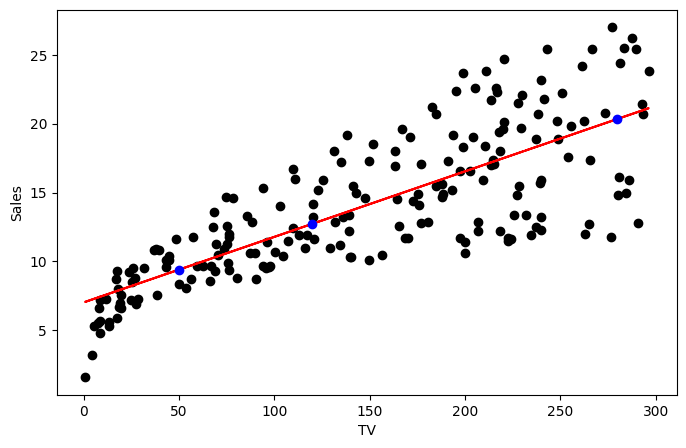

In [134]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.plot(X, Y, 'o', color='black')
ax.set_xlabel('TV')
ax.set_ylabel('Sales')

ax.plot(X, m_sklearn[0][0]*X+b_sklearn[0], color='red')
ax.plot(X_pred, Y_pred_sklearn, 'o', color='blue')

<a name='3'></a>
## 3 - Linear Regression using Gradient Descent

Functions to fit the models automatically are convenient to use, but for an in-depth understanding of the model and the maths behind it is good to implement an algorithm by yourself. Let's try to find linear regression coefficients $m$ and $b$, by minimising the difference between original values $y^{(i)}$ and predicted values $\hat{y}^{(i)}$ with the **loss function** $L\left(w, b\right)  = \frac{1}{2}\left(\hat{y}^{(i)} - y^{(i)}\right)^2$ for each of the training examples. Division by $2$ is taken just for scaling purposes, you will see the reason below, calculating partial derivatives.

To compare the resulting vector of the predictions $\hat{Y}$ with the vector $Y$ of original values $y^{(i)}$, you can take an average of the loss function values for each of the training examples:

$$E\left(m, b\right) = \frac{1}{2n}\sum_{i=1}^{n} \left(\hat{y}^{(i)} - y^{(i)}\right)^2 =
\frac{1}{2n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right)^2,\tag{1}$$

where $n$ is a number of data points. This function is called the sum of squares **cost function**. To use gradient descent algorithm, calculate partial derivatives as:

\begin{align}
\frac{\partial E }{ \partial m } &=
\frac{1}{n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right)x^{(i)},\\
\frac{\partial E }{ \partial b } &=
\frac{1}{n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right),
\tag{2}\end{align}

and update the parameters iteratively using the expressions

\begin{align}
m &= m - \alpha \frac{\partial E }{ \partial m },\\
b &= b - \alpha \frac{\partial E }{ \partial b },
\tag{3}\end{align}

where $\alpha$ is the learning rate.

Original arrays `X` and `Y` have different units. To make gradient descent algorithm efficient, you need to bring them to the same units. A common approach to it is called **normalization**: substract the mean value of the array from each of the elements in the array and divide them by standard deviation (a statistical measure of the amount of dispersion of a set of values). If you are not familiar with mean and standard deviation, do not worry about this for now - this is covered in the next Course of Specialization.

Normalization is not compulsory - gradient descent would work without it. But due to different units of `X` and `Y`, the cost function will be much steeper. Then you would need to take a significantly smaller learning rate $\alpha$, and the algorithm will require thousands of iterations to converge instead of a few dozens. Normalization helps to increase the efficiency of the gradient descent algorithm.

Normalization is implemented in the following code:

In [135]:
X_norm = (X - np.mean(X))/np.std(X)
Y_norm = (Y - np.mean(Y))/np.std(Y)

Define cost function according to the equation $(1)$:

In [136]:
def E(m, b, X, Y):
    ### START CODE HERE ### (~ 1 line of code)
    res = 1/(2*len(X)) * np.sum((m*X + b - Y)**2)
    ### END CODE HERE ###
    return res


<a name='ex05'></a>
### Exercise 5


Define functions `dEdm` and `dEdb` to calculate partial derivatives according to the equations $(2)$. This can be done using vector form of the input data `X` and `Y`.

In [137]:
def dEdm(m, b, X, Y):
  ### START CODE HERE ### (~ 1 line of code)
  # Use the following line as a hint, replacing all None.
  res = np.mean(X * ((m*X + b) - Y))
  ### END CODE HERE ###
  return res


def dEdb(m, b, X, Y):
    ### START CODE HERE ### (~ 1 line of code)
    # Replace None writing the required expression fully.
    res = np.mean(1 * ((m*X + b) - Y))

    ### END CODE HERE ###
    return res

In [138]:
print(dEdm(0, 0, X_norm, Y_norm))
print(dEdb(0, 0, X_norm, Y_norm))
print(dEdm(1, 5, X_norm, Y_norm))
print(dEdb(1, 5, X_norm, Y_norm))

-0.7822244248616063
1.6431300764452317e-16
0.21777557513839357
5.000000000000001


##### __Expected Output__

```Python
-0.7822244248616067
5.098005351200641e-16
0.21777557513839355
5.000000000000002
```

In [139]:
w2_unittest.test_partial_derivatives(dEdm, dEdb, X_norm, Y_norm)

 All tests passed


<a name='ex06'></a>
### Exercise 6


Implement gradient descent using expressions $(3)$:
\begin{align}
m &= m - \alpha \frac{\partial E }{ \partial m },\\
b &= b - \alpha \frac{\partial E }{ \partial b },
\end{align}

where $\alpha$ is the `learning_rate`.

In [140]:
def gradient_descent(dEdm, dEdb, m, b, X, Y, learning_rate = 0.001, num_iterations = 1000, print_cost=False):
    for iteration in range(num_iterations):
        ### START CODE HERE ### (~ 2 lines of code)
        m_new = m - learning_rate * dEdm(m, b, X, Y)
        b_new = b - learning_rate * dEdb(m, b, X, Y)
        ### END CODE HERE ###
        m = m_new
        b = b_new
        if print_cost:
            print (f"Cost after iteration {iteration}: {E(m, b, X, Y)}")

    return m, b

In [141]:
print(gradient_descent(dEdm, dEdb, 0, 0, X_norm, Y_norm))
print(gradient_descent(dEdm, dEdb, 1, 5, X_norm, Y_norm, learning_rate = 0.01, num_iterations = 10))

(0.49460408269589484, -1.3756551453525337e-16)
(0.9791767513915026, 4.521910375044022)


##### __Expected Output__

```Python
(0.49460408269589495, -3.489285249624889e-16)
(0.9791767513915026, 4.521910375044022)
```

In [142]:
w2_unittest.test_gradient_descent(gradient_descent, dEdm, dEdb, X_norm, Y_norm)

 All tests passed


Now run the gradient descent method starting from the initial point $\left(m_0, b_0\right)=\left(0, 0\right)$.

In [143]:
m_initial = 0; b_initial = 0; num_iterations = 1000; learning_rate = 1.2
m_gd, b_gd = gradient_descent(dEdm, dEdb, m_initial, b_initial,
                              X_norm, Y_norm, learning_rate, num_iterations, print_cost=True)

print(f"Gradient descent result: m_min, b_min = {m_gd}, {b_gd}")

Cost after iteration 0: 0.2062999755919659
Cost after iteration 1: 0.19455197461564464
Cost after iteration 2: 0.19408205457659175
Cost after iteration 3: 0.19406325777502964
Cost after iteration 4: 0.19406250590296714
Cost after iteration 5: 0.1940624758280847
Cost after iteration 6: 0.19406247462508938
Cost after iteration 7: 0.19406247457696957
Cost after iteration 8: 0.19406247457504477
Cost after iteration 9: 0.19406247457496775
Cost after iteration 10: 0.1940624745749647
Cost after iteration 11: 0.19406247457496456
Cost after iteration 12: 0.19406247457496456
Cost after iteration 13: 0.1940624745749646
Cost after iteration 14: 0.19406247457496456
Cost after iteration 15: 0.19406247457496456
Cost after iteration 16: 0.19406247457496456
Cost after iteration 17: 0.19406247457496456
Cost after iteration 18: 0.19406247457496456
Cost after iteration 19: 0.19406247457496456
Cost after iteration 20: 0.19406247457496456
Cost after iteration 21: 0.19406247457496456
Cost after iteration 22:

Remember, that the initial datasets were normalized. To make the predictions, you need to normalize `X_pred` array, calculate `Y_pred` with the linear regression coefficients `m_gd`, `b_gd` and then **denormalize** the result (perform the reverse process of normalization):

In [144]:
X_pred = np.array([50, 120, 280])
# Use the same mean and standard deviation of the original training array X
X_pred_norm = (X_pred - np.mean(X))/np.std(X)
Y_pred_gd_norm = m_gd * X_pred_norm + b_gd
# Use the same mean and standard deviation of the original training array Y
Y_pred_gd = Y_pred_gd_norm * np.std(Y) + np.mean(Y)

print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using Scikit_Learn linear regression:\n{Y_pred_sklearn.T}")
print(f"Predictions of sales using Gradient Descent:\n{Y_pred_gd}")

TV marketing expenses:
[ 50 120 280]
Predictions of sales using Scikit_Learn linear regression:
[[ 9.40942557 12.7369904  20.34285287]]
Predictions of sales using Gradient Descent:
[ 9.40942557 12.7369904  20.34285287]


In [145]:
import joblib

# Save the scikit-learn models by pickling it
joblib.dump(lr_model, 'lr_model.pkl')
joblib.dump(dt_model, 'dt_model.pkl')
joblib.dump(rf_model, 'rf_model.pkl')

# For the Gradient Descent model, you need to save the coefficients (m_gd, b_gd)
# and potentially the mean/std of X and Y if you used normalization
# You can save these values in a separate file, e.g., 'gd_params.pkl'
# Example:
gd_params = {'m_gd': m_gd, 'b_gd': b_gd, 'X_mean': np.mean(X), 'X_std': np.std(X),
             'Y_mean': np.mean(Y), 'Y_std': np.std(Y)}
joblib.dump(gd_params, 'gd_params.pkl')

['gd_params.pkl']

In [146]:
!pip install fastapi
!pip install uvicorn

In [147]:
#What imports do we need for Fast api
from fastapi import FastAPI
from pydantic import BaseModel
import uvicorn

In [149]:
from fastapi import FastAPI, HTTPException, Query
from pydantic import BaseModel
from typing import Union, Type, Literal
import joblib
import uvicorn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

app = FastAPI()

# Pydantic model for input data
class PredictionInput(BaseModel):
    modelName: Literal["Linear Regression", "Decision Tree", "Random Forest", "Gradient Descent"]
    tv: float

# Supported model types
SupportedModel = Union[Type[LinearRegression], Type[DecisionTreeRegressor], Type[RandomForestRegressor]]

# Load the models of scikit learn
lr_model = joblib.load('lr_model.pkl')
dt_model = joblib.load('dt_model.pkl')
rf_model = joblib.load('rf_model.pkl')

# Gradient Descent parameters (m_gd, b_gd, X, Y are available)
# Load Gradient Descent parameters
gd_params = joblib.load('gd_params.pkl')
m_gd = gd_params['m_gd']
b_gd = gd_params['b_gd']
X_mean = gd_params['X_mean']
X_std = gd_params['X_std']
Y_mean = gd_params['Y_mean']
Y_std = gd_params['Y_std']

# Function to make predictions
def predict_fast_api(modelName: str, tv: float):
    # Add constraints for tv (0 <= tv <= 500)
    if not (0 <= tv <= 1000):
        raise HTTPException(status_code=400, detail="TV marketing budget must be between 0 and 1000")

    # Get the model based on the modelName
    if modelName == "Linear Regression":
        model = lr_model
    elif modelName == "Decision Tree":
        model = dt_model
    elif modelName == "Random Forest":
        model = rf_model
    elif modelName == "Gradient Descent":
        # normalize input
        tv_norm = (tv - X_mean) / X_std
        tv_sales_norm = m_gd * tv_norm + b_gd
        # denormalize output
        tv_sales = tv_sales_norm * Y_std + Y_mean
        return tv_sales
    else:
        allowed_models = ["Linear Regression", "Decision Tree", "Random Forest", "Gradient Descent"]
        raise HTTPException(status_code=400, detail=f"Invalid model name. Allowed models are: {', '.join(allowed_models)}")

    # Reshape tv for scikit-learn models
    tv_input = np.array([[tv]])
    tv_sales = model.predict(tv_input)[0][0] if isinstance(model, LinearRegression) else model.predict(tv_input)[0]

    return tv_sales

@app.post("/predict")
async def predict_sales(input_data: PredictionInput):
    """
    Predicts tv sales based on TV marketing budget and model name.
    """
    try:
        tv_sales_prediction = predict_fast_api(input_data.modelName, input_data.tv)
    except HTTPException as e:
        return {"error": e.detail}

    return {"tv_sales": tv_sales_prediction}

# # Run the FastAPI app
# if __name__ == "__main__":
#     uvicorn.run(app, host="0.0.0.0", port=8000)

You should have gotten similar results as in the previous sections.

Well done! Now you know how gradient descent algorithm can be applied to train a real model. Re-producing results manually for a simple case should give you extra confidence that you understand what happends under the hood of commonly used functions.